# Stellar Evolutionary Track Data

In [1]:
from disktemperature import pmstracks
import numpy             as np
import matplotlib.pyplot as plt

from matplotlib.pyplot import style
from constants         import R_sun,AU,year,L_sun

%matplotlib inline

style.use(['seaborn-dark',{'axes.grid': True,'font.size':18,'figure.figsize':(10,8),'lines.linewidth':2}]);

### Initialize the tracks and calculate the parameters on a time grid

In [2]:
zm = [['01','0.5'],['02','0.5']] # two stars with different metallicity but same mass

stars  = [pmstracks.track(z=z,m=m) for z,m in zm]
time   = np.logspace(3,7,200)*year
tracks = np.array([[star.get_stellar_params(t_) for t_ in time] for star in stars])

----------------------
Grid_z01.tar.gz: 100.00%
Grid_z02.tar.gz: 100.00%
Grid_z03.tar.gz: 100.00%
Grid_z04.tar.gz: 100.00%
Extracting tracks
-----------------
Grid_z01.tar.gz
Grid_z02.tar.gz
Grid_z03.tar.gz
Grid_z04.tar.gz


### Plot time evolution of $T_\mathrm{eff}$, $R_\mathrm{eff}$, and $L$

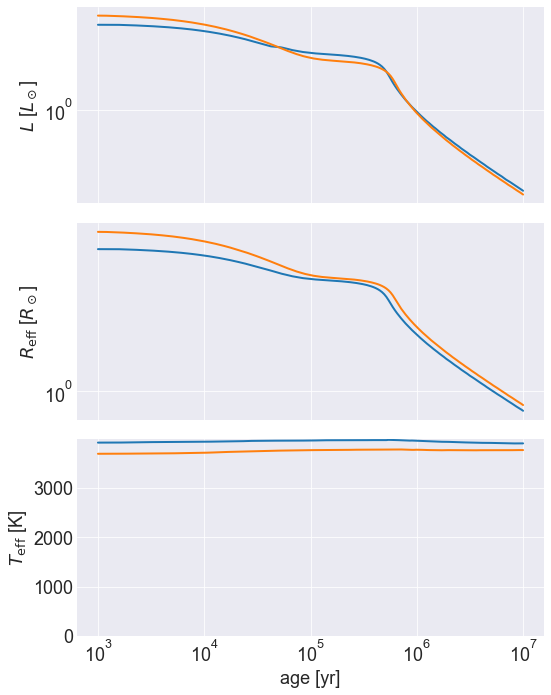

In [3]:
f,axs=plt.subplots(3,1,figsize=(8,10))

for track in tracks:
    for row,yl in enumerate(['$L$ [$L_\odot$]','$R_\mathrm{eff}$ [$R_\odot$]','$T_\mathrm{eff}$ [K]']):
        axs[row].loglog(time/year,track[:,row]/[L_sun,R_sun,1][row])
        axs[row].set_ylabel(yl)
        plt.setp(axs[row].xaxis.get_ticklabels(),visible=False)
        
plt.setp(axs[-1].xaxis.get_ticklabels(),visible=True)
axs[-1].xaxis.set_visible(True)
axs[-1].set_xlabel('age [yr]')
axs[-1].set_yscale('linear')
axs[-1].set_ylim(ymin=0);
f.tight_layout()

### Estimate how much the temperature at a given radius should change with time

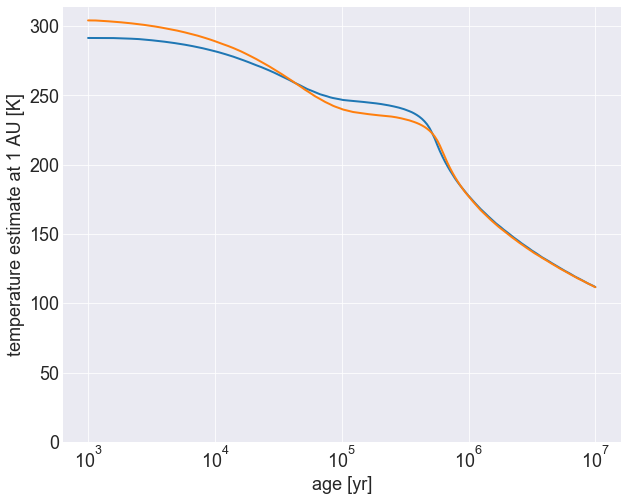

In [4]:
f,ax=plt.subplots()
for track in tracks:
    ax.semilogx(time/year,0.05**0.25*track[:,2]*(AU/(track[:,1]))**-0.5)
ax.set_xlabel('age [yr]')
ax.set_ylabel('temperature estimate at 1 AU [K]')
ax.set_ylim(ymin=0);